In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy
import seaborn as sns
from skbio.stats.composition import closure  # normalizes samples to add to 1.
%matplotlib inline

In [ ]:
# increase feature 'a' proportionally a lot

In [2]:
D = 1000   # number of species
S = 10     # number of different samples
N = 10000  # sequencing depth
R = 30     # number of replicates
otu_ids = ["O%d"%i for i in range(D)]
sample_ids = ["S%d"%i for i in range(S)]
data = [[1000]*D]
for a in np.logspace(0, 5, S-1):
    data.append([1000*a] + [1000]*(D-1))
table = pd.DataFrame(data, columns=otu_ids, index=sample_ids)

In [3]:
table

,O0,O1,O2,O3,O4,O5,O6,O7,O8,O9,...,O990,O991,O992,O993,O994,O995,O996,O997,O998,O999
S0,1.000000e+03,1000,1000,1000,1000,1000,1000,1000,1000,1000,...,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000
S1,1.000000e+03,1000,1000,1000,1000,1000,1000,1000,1000,1000,...,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000
S2,4.216965e+03,1000,1000,1000,1000,1000,1000,1000,1000,1000,...,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000
S3,1.778279e+04,1000,1000,1000,1000,1000,1000,1000,1000,1000,...,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000
S4,7.498942e+04,1000,1000,1000,1000,1000,1000,1000,1000,1000,...,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000
S5,3.162278e+05,1000,1000,1000,1000,1000,1000,1000,1000,1000,...,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000
S6,1.333521e+06,1000,1000,1000,1000,1000,1000,1000,1000,1000,...,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000
S7,5.623413e+06,1000,1000,1000,1000,1000,1000,1000,1000,1000,...,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000
S8,2.371374e+07,1000,1000,1000,1000,1000,1000,1000,1000,1000,...,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000
S9,1.000000e+08,1000,1000,1000,1000,1000,1000,1000,1000,1000,...,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000


In [4]:
fdr = []
for i in range(1, S):
    sample1 = np.random.multinomial(N, closure(table.iloc[0, :].values), size=R)
    sample2 = np.random.multinomial(N, closure(table.iloc[i, :].values), size=R)
    t, p = scipy.stats.ttest_ind(sample1, sample2)
    fdr.append((p[1:]<0.05).sum())

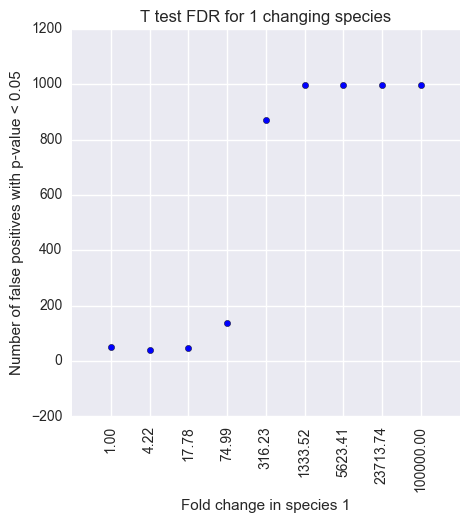

In [5]:
fig = plt.figure(figsize=(5, 5))
x = range(i)
plt.scatter(x, fdr)
labels = np.logspace(0, 5, S-1)
labels = ["%.2f" % a for a in labels]
_ = plt.xticks(x, labels, rotation=90)
plt.ylabel('Number of false positives with p-value < 0.05')
plt.xlabel('Fold change in species 1')
plt.title('T test FDR for 1 changing species')